<a href="https://colab.research.google.com/github/JoanneT8/FEN-Chess-Identifier-APS360-Summer-2021/blob/main/FEN_Chess_Identifier_APS360_2021_Group_3_Project_Baseline_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## FEN Chess Identifier Project

Welcome to Group 3's Google Colab Notebook! This is where we are going to build our FEN Chess Identifier machine learning model for APS360 Summer 2021.

**Team members: John Lee, Kevin Karam, Morgan Tran, Joanne Tan**

##  Project Overview
[Why did we choose this? What kind of results do we want?]
- Chess has been growing in popularity and this little tool would help online chess players quickly convert their current board (JEPG) into FEN to share with others to discuss and learn!
- The whole group has a general interest in chess
- We would like to successfully convert the inputed chess image into the correct FEN where it can later be inserted into your favourite online chess platform to re-create the exact same scenario for analysis or practice!

## Google Colab Shared Link
Baseline Model Link: https://colab.research.google.com/drive/1hBLG7VLoNU6S6vvo8Ff9rpU0ix5F1Wwj?usp=sharing

Main Model Link: https://colab.research.google.com/drive/1gLG2Td7MzgWcH2JUzr1E3Rst3kRTovYm?usp=sharing 

## Git Repository
Current Git repo is still private.

# Clean the Data
- Download the dataset
- Resize all images to 200 x 200 pixels
- Extract JPG name and replace all dashes with slashes, store into a dataframe?
- Convert images into numpy arrays, store into csv file

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Resizing images to 200 x 200 px

Following steps to download Kaggle dataset from this article: https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

In [ ]:
from google.colab import files
files.upload()  #this will prompt you to upload the kaggle.json

In [ ]:
# make sure you have pip installed
!pip --version 

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json  # set permission

In [ ]:
# import the Kaggle dataset from: https://www.kaggle.com/koryakinp/chess-positions 
!kaggle datasets download -d koryakinp/chess-positions -p '/content/drive/MyDrive/APS360_Project_Group_3/Chess_Positions_Datset'

In [ ]:
import os
os.chdir('/content/drive/MyDrive/APS360_Project_Group_3')  #change dir

**Note: Beware, unzipping this file takes approx. 2 hours 21 min!!!!!**

In [ ]:
!unzip -q archive.zip  #unzip dataset 

In [ ]:
# split a portion of the train data for a validation set
# save 20k images for validation set, 60k for training

#hmmm how do i split the train set in an easy way

In [ ]:
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms
import os
import shutil
import glob
import random
from numpy import asarray
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
train_dir = '/content/drive/MyDrive/APS360_Project_Group_3/dataset/train'
val_dir = '/content/drive/MyDrive/APS360_Project_Group_3/dataset/validation'
test_dir = '/content/drive/MyDrive/APS360_Project_Group_3/dataset/test'

In [ ]:
# why is this not working ughhhhhhh - it works on and off -- Reason: sometimes Google Colab finds the file to big to read 
# check to see if we have all the files
counter_train = 0
counter_val = 0
counter_test = 0

for file in os.listdir(train_dir):
  # print(file)
  counter_train += 1

for file in os.listdir(val_dir):
  counter_val += 1

for file in os.listdir(test_dir):
  counter_test += 1
  
print(counter_train)
print(counter_val)
print(counter_test)

In [ ]:
# ------------- DON'T RUN AGAIN --------------
# move 20,000 images into validation folder
# counter = 0
# for file in os.listdir(train_dir):
#   curr_path = os.path.join(train_dir, file)
#   if (counter < 20000):
#     shutil.move(curr_path, val_dir)
#     counter += 1
#   else:
#     break

Resizing images to 200 x 200 pixels

In [ ]:
#Import required Image library
from PIL import Image
counter = 0
finished = 0
other = 0
new_size = (200,200)

# resizing all images in train folder
for file in os.listdir(train_dir):
  curr_path = os.path.join(train_dir, file)

  #Create an Image Object from an Image
  im = Image.open(curr_path)

  # #Display actual image
  # im.show()

  if (im.size[0] != 200):
    #Make the new image half the width and half the height of the original image
    resized_im = im.resize(new_size)

    # #Display the resized imaged
    # resized_im.show()
    print(file)
    print(resized_im.size)
    print(counter)
    print()

    counter += 1
    #Save the cropped image
    resized_im.save(curr_path)
  elif (im.size[0] == 200):
    print("complete: " + str(finished))
    finished += 1
    print(im.size)
  else:
    print("other: " + str(other))
    other += 1
    print(im.size)

print()
print()
print("Completed = " + str(finished))
print("resized = " + str(counter))
print("other = " + str(other))



In [ ]:
counter = 0
new_size = (200,200)

# resizing all images in validation folder
for file in os.listdir(val_dir):
  curr_path = os.path.join(val_dir, file)

  #Create an Image Object from an Image
  im = Image.open(curr_path)

  # #Display actual image
  # im.show()

  if (im.size[0] != 200):
    #Make the new image half the width and half the height of the original image
    resized_im = im.resize(new_size)

    # #Display the resized imaged
    # resized_im.show()
    print(file)
    print(resized_im.size)
    print(counter)
    print()

    counter += 1
    #Save the cropped image
    resized_im.save(curr_path)

In [ ]:
counter = 0
new_size = (200,200)

# resizing all images in test folder
for file in os.listdir(test_dir):
  curr_path = os.path.join(test_dir, file)

  #Create an Image Object from an Image
  im = Image.open(curr_path)

  # #Display actual image
  # im.show()

  if (im.size[0] != 200):
    #Make the new image half the width and half the height of the original image
    resized_im = im.resize(new_size)

    # #Display the resized imaged
    # resized_im.show()
    print(file)
    print(resized_im.size)
    print(counter)
    print()

    counter += 1
    #Save the cropped image
    resized_im.save(curr_path)

Convert images into numpy array, and save to csv file along with the jpg modified name:
https://www.geeksforgeeks.org/how-to-convert-an-image-to-numpy-array-and-saveit-to-csv-file-using-python/

## How to differentiate between pieces?
- 13 classes (6 classes for white, 6 for black, 1 for blanks)
Augmenting pieces:
- change resolutions
- edge detection?
- mirror (if piece not symmetrical)
- add blank images
- add noise


In [ ]:
# create folders (Joanne)
#input 5 folders named: base, colour, noise, colournoise, mirror inside each of the 13 pieces
pieces_path = '/content/drive/MyDrive/APS360_Project_Group_3/pieces'
make_folders = ['base', 'colour', 'noise', 'colournoise', 'mirror']

for folder in os.listdir(pieces_path):
  curr_path = os.path.join(pieces_path, folder)

  for element in make_folders:
    new_path_Name = os.path.join(curr_path, element)
    os.mkdir(new_path_Name)

In [ ]:
# function for mirror (Kevin)
pieces_path = '/content/drive/MyDrive/APS360_Project_Group_3/pieces'

for folder in os.listdir(pieces_path):
  curr_path = os.path.join(pieces_path, folder, "base")
  target_path = os.path.join(pieces_path, folder, "mirror")

  #https://stackoverflow.com/questions/11903037/copy-all-jpg-file-in-a-directory-to-another-directory-in-python
  for file in glob.iglob(os.path.join(curr_path, "*.png")):
    shutil.copy(file, target_path)

In [ ]:
pieces_path = '/content/drive/MyDrive/APS360_Project_Group_3/pieces'

for folder in os.listdir(pieces_path):
  convert_PNG_to_JPEG(os.path.join(pieces_path, folder, "mirror"), (255, 255, 255))

In [ ]:
from PIL import Image, ImageOps

pieces_path = '/content/drive/MyDrive/APS360_Project_Group_3/pieces'
for folder in os.listdir(pieces_path):
  curr_path = os.path.join(pieces_path, folder, "mirror")
  number = 1
  for file in glob.iglob(os.path.join(curr_path, "*.jpeg")):
    im = Image.open(file)
    im_mirror = ImageOps.mirror(im)
    os.chdir(curr_path)
    fileName = "mirror" + str(number)
    im_mirror.save(fileName + ".jpeg", 'JPEG')
    number += 1
number = 1

In [ ]:
#renaming images to follow convention
pieces_path = '/content/drive/MyDrive/APS360_Project_Group_3/pieces'

for folder in os.listdir(pieces_path):
  curr_path = os.path.join(pieces_path, folder, "mirror")
  number = 1
  formatted_piece = pieceAndColour(folder)
  #print(folder)
  #print(formatted_piece)
  if formatted_piece == None:
    break
  for file in glob.iglob(os.path.join(curr_path, "*.jpeg")):
    fileName = formatted_piece + "_mirror" + str(number) + ".jpeg"
    number += 1
    print(fileName)
    os.rename(file, fileName)
number = 1

In [ ]:
# function for noise(moving the files)(John)
pieces_path = '/content/drive/MyDrive/APS360_Project_Group_3/pieces'

for folder in os.listdir(pieces_path):
  curr_path = os.path.join(pieces_path, folder, "base")
  target_path = os.path.join(pieces_path, folder, "noise")

  #https://stackoverflow.com/questions/11903037/copy-all-jpg-file-in-a-directory-to-another-directory-in-python
  for file in glob.iglob(os.path.join(curr_path, "*.png")):
    shutil.copy(file, target_path)
  

In [ ]:
pieces_path = '/content/drive/MyDrive/APS360_Project_Group_3/pieces'

for folder in os.listdir(pieces_path):
  convert_PNG_to_JPEG(os.path.join(pieces_path, folder, "noise"), (255, 255, 255))

In [ ]:
# removing all files with .png ending in noise folders
pieces_path = '/content/drive/MyDrive/APS360_Project_Group_3/pieces'
for folder in os.listdir(pieces_path):
  noise_path = os.path.join(pieces_path, folder, "noise")
  for file in os.listdir(noise_path):
    if file.endswith(".png"):
      os.remove(os.path.join(noise_path, file))

In [ ]:
#Adding gaussian noise to the images
pieces_path = '/content/drive/MyDrive/APS360_Project_Group_3/pieces'

for folder in os.listdir(pieces_path):
  curr_path = os.path.join(pieces_path, folder, "noise")
  formatted_piece = pieceAndColour(folder)
  number = 1
  for file in glob.iglob(os.path.join(curr_path, "*.jpeg")):
    nf = round(random.uniform(1.0,1.5), 2)
    #https://www.geeksforgeeks.org/how-to-convert-images-to-numpy-array/
    img= Image.open(file)
    np_img = np.array(img)

    tensor_img =torch.tensor(np_img)
    #Taken from the lecture on autoencoders
    noise = tensor_img + nf*torch.randn(*tensor_img.shape)

    noisy_image = np.array(noise, dtype=np.uint8)
    im = Image.fromarray(noisy_image)
    os.chdir(curr_path)
    fileName = formatted_piece+"_noise" + str(number)
    im.save(fileName + ".jpeg", 'JPEG')
    number += 1

In [ ]:
# removing non-noisy images from the noise folder
pieces_path = '/content/drive/MyDrive/APS360_Project_Group_3/pieces'
for folder in os.listdir(pieces_path):
  noise_path = os.path.join(pieces_path, folder, "noise")
  for file in os.listdir(noise_path):
    if file.endswith(").jpeg"):
      os.remove(os.path.join(noise_path, file))

In [ ]:
# remove all images in every noise folder
pieces_path = '/content/drive/MyDrive/APS360_Project_Group_3/pieces'

for folder in os.listdir(pieces_path):
  curr_path = os.path.join(pieces_path, folder, "noise")
  for file in os.listdir(curr_path):
    os.remove(curr_path+"/"+file)


In [ ]:
#adding noise to just the blank squares
pieces_path = '/content/drive/MyDrive/APS360_Project_Group_3/pieces/blank/base'

for folder in os.listdir(pieces_path):
  curr_path = pieces_path
  formatted_piece = "blank"
  number = 1
  for file in glob.iglob(os.path.join(curr_path, "*.jpeg")):
    nf = round(random.uniform(3,5), 2)
    #https://www.geeksforgeeks.org/how-to-convert-images-to-numpy-array/
    img= Image.open(file)
    np_img = np.array(img)

    tensor_img =torch.tensor(np_img)
    #Taken from the lecture on autoencoders
    noise = tensor_img + nf*torch.randn(*tensor_img.shape)

    noisy_image = np.array(noise, dtype=np.uint8)
    im = Image.fromarray(noisy_image)
    os.chdir('/content/drive/MyDrive/APS360_Project_Group_3/pieces/blank/noise')
    fileName = formatted_piece+"_noise" + str(number)
    im.save(fileName + ".jpeg", 'JPEG')
    number += 1

In [ ]:
#renaming images to follow convention
# pieces_path = '/content/drive/MyDrive/APS360_Project_Group_3/pieces'

# for folder in os.listdir(pieces_path):
#   curr_path = os.path.join(pieces_path, folder, "noise")
#   number = 1
#   formatted_piece = pieceAndColour(folder)
#   #print(folder)
#   #print(formatted_piece)
#   if formatted_piece == None:
#     break
#   for file in glob.iglob(os.path.join(curr_path, "*.jpeg")):
#     fileName = formatted_piece + "_noise" + str(number) + ".jpeg"
#     number += 1
#     print(fileName)
#     os.rename(file, fileName)
# number = 1

In [ ]:
#function that will output the proper format of piece and colour when given the folder it is in
#ex. 
#in: pieceAndColour(blackKnight) 
#out: n_b
def pieceAndColour(folder):
  if(folder == "whiteRook"):
    return "r_w"
  elif(folder == "whiteQueen"):
    return "q_w"
  elif(folder == "whitePawn"):
    return "p_w"
  elif(folder == "whiteKnight"):
    return "n_w"
  elif(folder == "whiteKing"):
    return "k_w"
  elif(folder == "whiteBishop"):
    return "b_w"
  elif(folder == "blackRook"):
    return "r_b"
  elif(folder == "blackQueen"):
    return "q_b"
  elif(folder == "blackPawn"):
    return "p_b"
  elif(folder == "blackKnight"):
    return "n_b"
  elif(folder == "blackKing"):
    return "k_b"
  elif(folder == "blackBishop"):
    return "b_b"
  elif(folder == "blank"):
    return "blank"



In [ ]:
# function for background colour (Morgan)
# [@Morgan] use the convert convert_PNG_to_JPEG(dir_name, backgroundColour) to create the images
# you just need to loop through every image in the folder, and randomize a R, G, B value each time
import os
from PIL import Image
from random import randint 
import glob



pieces_dataset_path = '/content/drive/MyDrive/APS360_Project_Group_3/pieces'
##os.listdir(pieces_dataset_path)

dir_list = next(os.walk(pieces_dataset_path))[1]


for i in dir_list:
  if i == "blank":  
    pass
  else:

#i = "whiteKing"
    count = 1
    prefix = pieceAndColour(i)
    aug = "colournoise"

    path = os.path.join(pieces_dataset_path, i)
    base = os.path.join(path,"base")
    end = os.path.join(path, aug)

    name_b = prefix +"_" + aug


    #remove any files in there
    remove = glob.glob(end+"/*")
    for r in remove:
      print (r)
      os.remove(r)


    for f in os.listdir(base):
      name = name_b + str(count)

      name = name + ".jpeg"
      fn = os.path.join(base,f)
      file = os.path.join (end,name)
      image = Image.open(fn).convert("RGBA")
      colour_R = randint(0,255)
      colour_G = randint(0,255)
      colour_B = randint(0,255)
      finalColour = (colour_R, colour_G, colour_B)
      new_image = Image.new("RGBA", image.size, finalColour)
      new_image.paste(image, mask=image)
      new_image.convert("RGB").save(file, "JPEG")
      count +=1



In [ ]:
"""
Code to mirror [Morgan]
"""

import os
from PIL import Image, ImageOps
from random import randint 
import glob



pieces_dataset_path = '/content/drive/MyDrive/APS360_Project_Group_3/pieces'
dir_list = next(os.walk(pieces_dataset_path))[1]
#dir_list = ["whiteKing"]

for i in dir_list:
  if i == "blank":  
    pass
  else:
    end_path = pieces_dataset_path +"/"+i+"/mirror"
    remove = glob.glob(end_path+"/*")
    for r in remove:
      print (r)
      os.remove(r)

    prefix = pieceAndColour(i)
    
    aug_path = os.path.join(pieces_dataset_path, i)
    aug_list = next(os.walk(aug_path))[1]

                    
    for aug in aug_list:
      if aug == "mirror":
        pass
      else:
      
        cur_path = os.path.join(aug_path, aug)
        count = 1
        name_b = prefix +"_" + aug+"_mirror"
        
        for f in os.listdir(cur_path):
          fn = os.path.join(cur_path,f)
          name = name_b+str(count) + ".jpeg"
          im = Image.open(fn)
          im_mirror = ImageOps.mirror(im).convert("RGB")
          dest = os.path.join (end_path, name)

          im_mirror.save(dest, 'JPEG')
          count+=1

/content/drive/MyDrive/APS360_Project_Group_3/pieces/whiteKing/mirror/k_w_base_mirror1.jpeg
/content/drive/MyDrive/APS360_Project_Group_3/pieces/whiteKing/mirror/k_w_colour_mirror2.jpeg
/content/drive/MyDrive/APS360_Project_Group_3/pieces/whiteKing/mirror/k_w_colour_mirror3.jpeg
/content/drive/MyDrive/APS360_Project_Group_3/pieces/whiteKing/mirror/k_w_colour_mirror4.jpeg
/content/drive/MyDrive/APS360_Project_Group_3/pieces/whiteKing/mirror/k_w_colour_mirror5.jpeg
/content/drive/MyDrive/APS360_Project_Group_3/pieces/whiteKing/mirror/k_w_colour_mirror6.jpeg
/content/drive/MyDrive/APS360_Project_Group_3/pieces/whiteKing/mirror/k_w_colour_mirror7.jpeg
/content/drive/MyDrive/APS360_Project_Group_3/pieces/whiteKing/mirror/k_w_colour_mirror8.jpeg
/content/drive/MyDrive/APS360_Project_Group_3/pieces/whiteKing/mirror/k_w_colour_mirror9.jpeg
/content/drive/MyDrive/APS360_Project_Group_3/pieces/whiteKing/mirror/k_w_colour_mirror10.jpeg
/content/drive/MyDrive/APS360_Project_Group_3/pieces/whiteKin

In [ ]:
# Image generation of colour and noise
pieces_path = '/content/drive/MyDrive/APS360_Project_Group_3/pieces'

for folder in os.listdir(pieces_path):
  curr_path = os.path.join(pieces_path, folder, "colournoise")
  formatted_piece = pieceAndColour(folder)
  number = 1
  for file in glob.iglob(os.path.join(curr_path, "*.jpeg")):
    nf = round(random.uniform(1.0,1.5), 2)
    #https://www.geeksforgeeks.org/how-to-convert-images-to-numpy-array/
    img= Image.open(file)
    np_img = np.array(img)

    tensor_img =torch.tensor(np_img)

    noise = tensor_img + nf*torch.randn(*tensor_img.shape)

    noisy_image = np.array(noise, dtype=np.uint8)
    im = Image.fromarray(noisy_image)
    os.chdir(curr_path)
    fileName = formatted_piece+"_colournoise" + str(number)
    im.save(fileName + ".jpeg", 'JPEG')
    number += 1
  number = 1

In [ ]:
## function for converting png to jpeg (Joanne)
# https://stackoverflow.com/questions/43258461/convert-png-to-jpeg-using-pillow 
# https://stackoverflow.com/questions/50739732/how-to-covert-png-to-jpeg-using-pillow-while-image-color-is-black

# Example of how to use this function:
# convert_PNG_to_JPEG('/content/drive/MyDrive/APS360_Project_Group_3/pieces/testing_Joanne', (255,255,255))
# or
# backgroundColour = (255,255,255)
# convert_PNG_to_JPEG('/content/drive/MyDrive/APS360_Project_Group_3/pieces/testing_Joanne', backgroundColour)

from PIL import Image
import os

def convert_PNG_to_JPEG(dir_name, backgroundColour):
  # fill_color_white = (255, 255, 255)
  
  # goes through each file in the directory
  for file in os.listdir(dir_name):
    curr_path = os.path.join(dir_name, file)

    # Getting only the file name without the file extension
    fileName = os.path.splitext(curr_path)[0]

    # Convert the PNG to JPEG
    im = Image.open(curr_path)

    im = im.convert("RGBA")   # it had mode P after DL it from OP
    if im.mode in ('RGBA'):
      # create background, overlay it on top of the image
      background = Image.new(im.mode[:-1], im.size, backgroundColour)

      # put the png image on top of the background, then get rid of transparency
      background.paste(im, im.split()[-1]) # omit transparency
      im = background

    rgb_im = im.convert('RGB')
    rgb_im.save(fileName + '.jpeg', 'JPEG')

In [ ]:
# Creating Blanks (Joanne)
# Populating blanks in the base and colour folder of blanks class
from PIL import Image  
from random import randint 
import os

image_size = (200, 200)
basePath_blankClass = '/content/drive/MyDrive/APS360_Project_Group_3/pieces/blank/base'
blankPath = '/content/drive/MyDrive/APS360_Project_Group_3/pieces/blank'
os.chdir(blankPath) # change directory


variationFolders = ['base', 'colour']
for folder in variationFolders:
  curr_path = os.path.join(blankPath, folder)

  # 16 whites, 16 black images in base folder
  if (folder == 'base'):
    # delete what's in the folder
    for file in os.listdir(curr_path):
      os.remove(os.path.join(curr_path, file))
      print("removed: " + os.path.join(curr_path, file))

    for i in range(1,17):
      blackBackground = (0,0,0)
      img  = Image.new("RGB", image_size, blackBackground)
      saveDestination = os.path.join(curr_path,'blank'+str(i)+'.jpeg')
      img.save(saveDestination, 'JPEG')
      print(saveDestination)

    for i in range(17,33):
      whiteBackground = (255,255,255)
      img  = Image.new("RGB", image_size, whiteBackground)
      saveDestination = os.path.join(curr_path,'blank'+str(i)+'.jpeg')
      img.save(saveDestination, 'JPEG')
      print(saveDestination)
    

  if (folder == 'colour'):
    for file in os.listdir(curr_path):
      os.remove(os.path.join(curr_path, file))
      print("removed: " + os.path.join(curr_path, file))

    for i in range(1,33):
      colour_R = randint(0,255)
      colour_G = randint(0,255)
      colour_B = randint(0,255)
      finalColour = (colour_R, colour_G, colour_B)

      img  = Image.new("RGB", image_size, finalColour)
      saveDestination = os.path.join(curr_path,'blank_colour'+str(i)+'.jpeg')
      img.save(saveDestination, 'JPEG')
      print(saveDestination)
  

removed: /content/drive/MyDrive/APS360_Project_Group_3/pieces/blank/base/blank2.jpeg
removed: /content/drive/MyDrive/APS360_Project_Group_3/pieces/blank/base/blank3.jpeg
removed: /content/drive/MyDrive/APS360_Project_Group_3/pieces/blank/base/blank4.jpeg
removed: /content/drive/MyDrive/APS360_Project_Group_3/pieces/blank/base/blank5.jpeg
removed: /content/drive/MyDrive/APS360_Project_Group_3/pieces/blank/base/blank6.jpeg
removed: /content/drive/MyDrive/APS360_Project_Group_3/pieces/blank/base/blank7.jpeg
removed: /content/drive/MyDrive/APS360_Project_Group_3/pieces/blank/base/blank9.jpeg
removed: /content/drive/MyDrive/APS360_Project_Group_3/pieces/blank/base/blank8.jpeg
removed: /content/drive/MyDrive/APS360_Project_Group_3/pieces/blank/base/blank10.jpeg
removed: /content/drive/MyDrive/APS360_Project_Group_3/pieces/blank/base/blank11.jpeg
removed: /content/drive/MyDrive/APS360_Project_Group_3/pieces/blank/base/blank12.jpeg
removed: /content/drive/MyDrive/APS360_Project_Group_3/pieces/

In [ ]:
#Generating colournoise for blank class
pieces_path = '/content/drive/MyDrive/APS360_Project_Group_3/pieces/blank/colour'

for file in os.listdir('/content/drive/MyDrive/APS360_Project_Group_3/pieces/blank/colournoise'):
  removeFile = os.path.join('/content/drive/MyDrive/APS360_Project_Group_3/pieces/blank/colournoise', file)
  os.remove(removeFile)
  print("removed: " + removeFile)

# for folder in os.listdir(pieces_path):
curr_path = pieces_path
formatted_piece = "blank"
number = 1
for file in glob.iglob(os.path.join(curr_path, "*.jpeg")):
  nf = round(random.uniform(3,5), 2)
  #https://www.geeksforgeeks.org/how-to-convert-images-to-numpy-array/
  img= Image.open(file)
  np_img = np.array(img)

  tensor_img =torch.tensor(np_img)
  #Taken from the lecture on autoencoders
  noise = tensor_img + nf*torch.randn(*tensor_img.shape)

  noisy_image = np.array(noise, dtype=np.uint8)
  im = Image.fromarray(noisy_image)
  fileName = '/content/drive/MyDrive/APS360_Project_Group_3/pieces/blank/colournoise/' + formatted_piece+"_colournoise" + str(number) + ".jpeg"
  im.save(fileName, 'JPEG')
  number += 1
  print(fileName)

removed: /content/drive/MyDrive/APS360_Project_Group_3/pieces/blank/colournoise/blank_colournoise1.jpeg
removed: /content/drive/MyDrive/APS360_Project_Group_3/pieces/blank/colournoise/blank_colournoise2.jpeg
removed: /content/drive/MyDrive/APS360_Project_Group_3/pieces/blank/colournoise/blank_colournoise3.jpeg
removed: /content/drive/MyDrive/APS360_Project_Group_3/pieces/blank/colournoise/blank_colournoise4.jpeg
removed: /content/drive/MyDrive/APS360_Project_Group_3/pieces/blank/colournoise/blank_colournoise5.jpeg
removed: /content/drive/MyDrive/APS360_Project_Group_3/pieces/blank/colournoise/blank_colournoise6.jpeg
removed: /content/drive/MyDrive/APS360_Project_Group_3/pieces/blank/colournoise/blank_colournoise7.jpeg
removed: /content/drive/MyDrive/APS360_Project_Group_3/pieces/blank/colournoise/blank_colournoise8.jpeg
removed: /content/drive/MyDrive/APS360_Project_Group_3/pieces/blank/colournoise/blank_colournoise9.jpeg
removed: /content/drive/MyDrive/APS360_Project_Group_3/pieces/bl

In [ ]:
# generating noise for blank class
pieces_path = '/content/drive/MyDrive/APS360_Project_Group_3/pieces/blank/base'

for file in os.listdir('/content/drive/MyDrive/APS360_Project_Group_3/pieces/blank/noise'):
  removeFile = os.path.join('/content/drive/MyDrive/APS360_Project_Group_3/pieces/blank/noise', file)
  os.remove(removeFile)
  print("removed: " + removeFile)

formatted_piece = "blank"
number = 1
for file in glob.iglob(os.path.join(pieces_path, "*.jpeg")):
  nf = round(random.uniform(3,5), 2)
  #https://www.geeksforgeeks.org/how-to-convert-images-to-numpy-array/
  img= Image.open(file)
  np_img = np.array(img)

  tensor_img =torch.tensor(np_img)
  #Taken from the lecture on autoencoders
  noise = tensor_img + nf*torch.randn(*tensor_img.shape)

  noisy_image = np.array(noise, dtype=np.uint8)
  im = Image.fromarray(noisy_image)
  fileName = '/content/drive/MyDrive/APS360_Project_Group_3/pieces/blank/noise/' + formatted_piece+"_noise" + str(number) + ".jpeg"
  im.save(fileName, 'JPEG')
  number += 1
  print(fileName)

/content/drive/MyDrive/APS360_Project_Group_3/pieces/blank/noise/blank_noise1.jpeg
/content/drive/MyDrive/APS360_Project_Group_3/pieces/blank/noise/blank_noise2.jpeg
/content/drive/MyDrive/APS360_Project_Group_3/pieces/blank/noise/blank_noise3.jpeg
/content/drive/MyDrive/APS360_Project_Group_3/pieces/blank/noise/blank_noise4.jpeg
/content/drive/MyDrive/APS360_Project_Group_3/pieces/blank/noise/blank_noise5.jpeg
/content/drive/MyDrive/APS360_Project_Group_3/pieces/blank/noise/blank_noise6.jpeg
/content/drive/MyDrive/APS360_Project_Group_3/pieces/blank/noise/blank_noise7.jpeg
/content/drive/MyDrive/APS360_Project_Group_3/pieces/blank/noise/blank_noise8.jpeg
/content/drive/MyDrive/APS360_Project_Group_3/pieces/blank/noise/blank_noise9.jpeg
/content/drive/MyDrive/APS360_Project_Group_3/pieces/blank/noise/blank_noise10.jpeg
/content/drive/MyDrive/APS360_Project_Group_3/pieces/blank/noise/blank_noise11.jpeg
/content/drive/MyDrive/APS360_Project_Group_3/pieces/blank/noise/blank_noise12.jpeg
/

In [ ]:
'''
Joanne
Mirroring everything in the blank class and put it into the mirror folder
'''

import os
from PIL import Image, ImageOps
from random import randint 
import glob

pieces_dataset_path = '/content/drive/MyDrive/APS360_Project_Group_3/pieces/blank'
target_path = '/content/drive/MyDrive/APS360_Project_Group_3/pieces/blank/mirror'
dir_list = next(os.walk(pieces_dataset_path))[1]
print(dir_list)

# first delete whatever is in the mirror folder in the blank class
for file in os.listdir(target_path):
  removeFile = os.path.join(target_path, file)
  os.remove(removeFile)
  print("removed: " + removeFile)

for folder in dir_list:
  if (folder == 'mirror'):
    continue
  curr_path = os.path.join(pieces_dataset_path, folder)

  counter = 1
  for file in os.listdir(curr_path):
    im = Image.open(os.path.join(curr_path, file))

    # mirroring all the images in blank class and put it into mirror
    im_mirror = ImageOps.mirror(im).convert("RGB")
    dest = os.path.join (target_path, 'blank_' + folder + '_mirror' + str(counter) + '.jpeg')

    im_mirror.save(dest, 'JPEG')
    counter+=1
    print(dest)

In [ ]:
# copy all pngs to another folder for safe keeping
png_path = '/content/drive/MyDrive/APS360_Project_Group_3/pieces_png'
os.chdir(png_path)

pieces = ['whiteRook', 'whiteQueen', 'whitePawn', 'whiteKnight', 'whiteKing', 'whiteBishop', 'blackRook', 'blackQueen', 'blackPawn', 'blackKnight', 'blackKing', 'blackBishop']

for chessPiece in pieces:
  os.mkdir(chessPiece)

In [ ]:
pieces_path = '/content/drive/MyDrive/APS360_Project_Group_3/pieces'
png_path = '/content/drive/MyDrive/APS360_Project_Group_3/pieces_png'

for pieceFolderName in pieces:
  baseFolder = os.path.join(pieces_path, pieceFolderName, 'base')
  target_path = os.path.join(png_path, pieceFolderName)
  for file in os.listdir(baseFolder):
    # print(file)
    shutil.copy(os.path.join(baseFolder, file), target_path)

In [ ]:
# make all base images have a white background
pieces_path = '/content/drive/MyDrive/APS360_Project_Group_3/pieces'

for folder in os.listdir(pieces_path):
  base_path = os.path.join(pieces_path, folder, 'base')
  whiteBackground = (255,255,255)
  convert_PNG_to_JPEG(base_path, whiteBackground)

In [ ]:
'''
Re-populating all white pieces base images (Joanne)
'''
whitePieces = ['whiteRook', 'whiteQueen', 'whitePawn', 'whiteKnight', 'whiteKing', 'whiteBishop']
pieces_path = '/content/drive/MyDrive/APS360_Project_Group_3/pieces'
png_pieces_path = '/content/drive/MyDrive/APS360_Project_Group_3/pieces_png'
whiteBackground = (255,255,255)

for whitePiece in whitePieces:
  base_path = os.path.join(pieces_path, whitePiece, 'base')
  formatted_piece = pieceAndColour(whitePiece)
  # first delete whatever is inside the base folder
  for file in os.listdir(base_path):
    os.remove(os.path.join(base_path, file))

  png_path = os.path.join(png_pieces_path, whitePiece)
  counter = 1
  for file in os.listdir(png_path):
    
    curr_path = os.path.join(png_path, file)

    # Getting only the file name without the file extension
    fileName = os.path.splitext(curr_path)[0]

    # Convert the PNG to JPEG
    im = Image.open(curr_path)

    im = im.convert("RGBA")   # it had mode P after DL it from OP
    if im.mode in ('RGBA'):
      # create background, overlay it on top of the image
      background = Image.new(im.mode[:-1], im.size, whiteBackground)

      # put the png image on top of the background, then get rid of transparency
      background.paste(im, im.split()[-1]) # omit transparency
      im = background

      rgb_im = im.convert('RGB')
      os.chdir(base_path)
      rgb_im.save(formatted_piece + '_base' + str(counter) + '.jpeg', 'JPEG')
      counter += 1


In [ ]:
# removing all files with .png ending in base folders
pieces_path = '/content/drive/MyDrive/APS360_Project_Group_3/pieces'
for folder in os.listdir(pieces_path):
  base_path = os.path.join(pieces_path, folder, "base")
  for file in os.listdir(base_path):
    if file.endswith(".png"):
      os.remove(os.path.join(base_path, file))

In [ ]:
# rename all jpeg images in base folders to match naming conventions
for folder in os.listdir(pieces_path):
  if folder == 'blank':
    continue
  base_path = os.path.join(pieces_path, folder, "base")
  formatted_piece = pieceAndColour(folder)
  print(formatted_piece)
  counter = 1
  for file in os.listdir(base_path):
    newFileName = formatted_piece + "_base" + str(counter) + ".jpeg"
    os.rename(os.path.join(base_path, file), os.path.join(base_path, newFileName))
    counter += 1

p_w
r_w
b_w
n_w
q_w
k_w
p_b
b_b
r_b
n_b
q_b
k_b


In [ ]:
# rename all jpeg images in mirror folders to match naming conventions
for folder in os.listdir(pieces_path):
  if folder == 'blank':
    continue
  mirror_path = os.path.join(pieces_path, folder, "mirror")
  formatted_piece = pieceAndColour(folder)
  print(formatted_piece)
  counter = 1
  for file in os.listdir(mirror_path):
    newFileName = formatted_piece + "_mirror" + str(counter) + ".jpeg"
    os.rename(os.path.join(mirror_path, file), os.path.join(mirror_path, newFileName))
    counter += 1

p_w
r_w
b_w
n_w
q_w
k_w
p_b
b_b
r_b
n_b
q_b
k_b


In [ ]:
# creating folders for pieces_dataset
pieces_shortForm = ['r_w', 'q_w', 'p_w', 'n_w', 'k_w', 'b_w', 'r_b', 'q_b', 'p_b', 'n_b', 'k_b', 'b_b', 'blank']
pieces_dataset_path = '/content/drive/MyDrive/APS360_Project_Group_3/pieces_dataset'

os.chdir(pieces_dataset_path)

os.mkdir('pieces_train')
os.mkdir('pieces_val')
os.mkdir('pieces_test')

os.chdir(pieces_dataset_path)
for folder in os.listdir(pieces_dataset_path):
  for chessPiece in pieces_shortForm:
    os.mkdir(os.path.join(pieces_dataset_path, folder, chessPiece))

In [ ]:
#Populating the pieces_dataset 60/20/20

import random

mov_pieces_path = '/content/drive/MyDrive/APS360_Project_Group_3/pieces_dataset/pieces'
form = ["base","colour","colournoise","mirror","noise"]
for folder in os.listdir(mov_pieces_path):
  formatted_piece = pieceAndColour(folder)
  for fold in form: 
    mov_path = os.path.join(mov_pieces_path, folder, fold)
    count = 1
    for file in glob.iglob(os.path.join(mov_path, "*.jpeg")):
      moving_image = random.choice([
    x for x in os.listdir(mov_path)
    if os.path.isfile(os.path.join(mov_path, x))])
      #https://www.codegrepper.com/code-examples/python/select+random+image+from+folder+python
      if fold == "mirror":
          if count<77:
            shutil.move('/content/drive/MyDrive/APS360_Project_Group_3/pieces_dataset/pieces/{}/{}/{}'.format(folder,fold,moving_image),'/content/drive/MyDrive/APS360_Project_Group_3/pieces_dataset/pieces_train/{}'.format(formatted_piece))
          elif count<103:
            shutil.move('/content/drive/MyDrive/APS360_Project_Group_3/pieces_dataset/pieces/{}/{}/{}'.format(folder,fold,moving_image),'/content/drive/MyDrive/APS360_Project_Group_3/pieces_dataset/pieces_val/{}'.format(formatted_piece))
          else:
            shutil.move('/content/drive/MyDrive/APS360_Project_Group_3/pieces_dataset/pieces/{}/{}/{}'.format(folder,fold,moving_image),'/content/drive/MyDrive/APS360_Project_Group_3/pieces_dataset/pieces_test/{}'.format(formatted_piece))
      else:
          if count<21:
            shutil.move('/content/drive/MyDrive/APS360_Project_Group_3/pieces_dataset/pieces/{}/{}/{}'.format(folder,fold,moving_image),'/content/drive/MyDrive/APS360_Project_Group_3/pieces_dataset/pieces_train/{}'.format(formatted_piece))
          elif count<27:
            shutil.move('/content/drive/MyDrive/APS360_Project_Group_3/pieces_dataset/pieces/{}/{}/{}'.format(folder,fold,moving_image),'/content/drive/MyDrive/APS360_Project_Group_3/pieces_dataset/pieces_val/{}'.format(formatted_piece))
          else:
            shutil.move('/content/drive/MyDrive/APS360_Project_Group_3/pieces_dataset/pieces/{}/{}/{}'.format(folder,fold,moving_image),'/content/drive/MyDrive/APS360_Project_Group_3/pieces_dataset/pieces_test/{}'.format(formatted_piece))
      count+=1


In [ ]:
# count number of files in pieces folder
for piece in os.listdir('/content/drive/MyDrive/APS360_Project_Group_3/pieces'):
  curr_path = os.path.join('/content/drive/MyDrive/APS360_Project_Group_3/pieces', piece)
  
  total = 0
  for folderVariation in os.listdir(curr_path):
    counter = 0
    next_path = os.path.join(curr_path, folderVariation)
    for file in os.listdir(next_path):
      counter += 1
    total = total + counter
    # print (piece + folderVariation + " total = " + str(counter))
  print(piece + "total = " + str(total))

whitePawntotal = 256
whiteRooktotal = 256
whiteBishoptotal = 256
whiteKnighttotal = 256
whiteQueentotal = 256
whiteKingtotal = 256
blanktotal = 256
blackPawntotal = 256
blackBishoptotal = 256
blackRooktotal = 256
blackKnighttotal = 256
blackQueentotal = 256
blackKingtotal = 256


## How to detect board positions:




*   Total of 64 positions on the board, place one piece on each positions individually, generate data
*   List item



# How to detect both Chess piece and board position
- use bounding boxes to identify pieces on the chess board (can do this in PyTorch or Tensorflow) 
  - downside: you might need to do this manually
- classify each box that was found by the neural network


# Creating the Baseline Model for Identifying a Chess Piece


Outline of Baseline Model:
*   Start off by first identifying white and black pieces using the colours HSP value
*   Identify the piece by comparing it with an existing group of images of each piece



In [ ]:
pieces_path = '/content/drive/MyDrive/APS360_Project_Group_3/baseline/default' #Location of the default piece images
test_path = '/content/drive/MyDrive/APS360_Project_Group_3/baseline/test' #Location of the test images

colour = None
piece = None
output = None
answer = None
total = 0
correct = 0
piece_correct = 0
colour_correct = 0

rook = None
queen = None
pawn = None
knight = None
king = None
bishop = None
blank = None

#loads in default pieces as numpy arrays
for file in glob.iglob(os.path.join(pieces_path, "*.jpeg")):

  #https://www.geeksforgeeks.org/how-to-convert-images-to-numpy-array/
  if file == "/content/drive/MyDrive/APS360_Project_Group_3/baseline/default/r.jpeg":
    img= Image.open(file)
    rook = np.array(img)
  elif file == "/content/drive/MyDrive/APS360_Project_Group_3/baseline/default/q.jpeg":
    img= Image.open(file)
    queen = np.array(img)
  elif file == "/content/drive/MyDrive/APS360_Project_Group_3/baseline/default/p.jpeg":
    img= Image.open(file)
    pawn = np.array(img)
  elif file == "/content/drive/MyDrive/APS360_Project_Group_3/baseline/default/n.jpeg":
    img= Image.open(file)
    knight = np.array(img)
  elif file == "/content/drive/MyDrive/APS360_Project_Group_3/baseline/default/k.jpeg":
    img= Image.open(file)
    king = np.array(img)
  elif file == "/content/drive/MyDrive/APS360_Project_Group_3/baseline/default/b.jpeg":
    img= Image.open(file)
    bishop = np.array(img) 
  elif file == "/content/drive/MyDrive/APS360_Project_Group_3/baseline/default/blank.jpeg":
    img= Image.open(file)
    blank = np.array(img)

#goes through wherever the images are being stored and checks them for colour and similarity to the piece, it will also keep track of accuracy
for image in glob.iglob(os.path.join(test_path, "*.jpeg")):
  img= Image.open(image)
  input = np.array(img)

  curr_path = os.path.join(test_path, image)
  fileName = os.path.splitext(curr_path)[0]
  answer = fileName[60:63]

  #Setting the RGB value of the middle of the input image to its own variable
  r = input[25][25][0]
  g = input[25][25][1]
  b = input[25][25][2]

  #colour check using HSP value
  #https://stackoverflow.com/questions/22603510/is-this-possible-to-detect-a-colour-is-a-light-or-dark-colour
  hsp = math.sqrt(0.299 * (r * r) + 0.587 * (g * g) + 0.114 * (b * b))
  #print(hsp)
  if hsp > 3:
    colour = "w"
  else:
    colour = "b"


  #Checks the input image against all other piece types
  totalDifference = None
  lowestDifference = None
  pieceName = None

  totalDifference, pieceName = differenceCheck(input, rook, "r")
  lowestDifference = totalDifference
  piece = pieceName

  totalDifference, pieceName = differenceCheck(input, queen, "q")
  if totalDifference < lowestDifference:
    lowestDifference = totalDifference
    piece = pieceName

  totalDifference, pieceName = differenceCheck(input, pawn, "p")
  if totalDifference < lowestDifference:
    lowestDifference = totalDifference
    piece = pieceName

  totalDifference, pieceName = differenceCheck(input, knight, "n")
  if totalDifference < lowestDifference:
    lowestDifference = totalDifference
    piece = pieceName

  totalDifference, pieceName = differenceCheck(input, king, "k")
  if totalDifference < lowestDifference:
    lowestDifference = totalDifference
    piece = pieceName

  totalDifference, pieceName = differenceCheck(input, bishop, "b")
  if totalDifference < lowestDifference:
    lowestDifference = totalDifference
    piece = pieceName

  totalDifference, pieceName = differenceCheck(input, blank, "blank")
  if totalDifference < lowestDifference:
    lowestDifference = totalDifference
    piece = pieceName

  if piece == "blank":
    output = "bla"
  else:
    output = piece + "_" + colour
  
  #validate the guess
  if output == answer:
    correct +=1
  if output[0] == answer[0] and output != "bla":
    piece_correct += 1
  if output[2] == answer[2] and output != "bla":
    colour_correct += 1
  
  total += 1

print("Total accuracy: ", correct/total)
print("Colour accuracy: ", colour_correct /total)
print("Piece accuracy: ", piece_correct/total)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in ubyte_scalars
  """


Total accuracy:  0.14
Colour accuracy:  0.34
Piece accuracy:  0.16


In [ ]:
def differenceCheck(input, pieceName, name):
  totalDifference = 0
  for i in range(0,49):
    for j in range(0,49):
      totalDifference += abs(input[i][j][0] - pieceName[i][j][0])
  return totalDifference, name

# Our Model

- try overfitting using a small subsample of the dataset first (to see if we even have the capacity to do so)

## Accuracy and Plotting Functions

In [ ]:
def plot_training_curve(path):
    import matplotlib.pyplot as plt
    train_acc = np.loadtxt("{}_train_accuracy.csv".format(path))
    val_acc = np.loadtxt("{}_val_accuracy.csv".format(path))
    
    plt.title("Train vs Validation Accuracy")
    n = len(train_acc) # number of epochs
    plt.plot(range(1,n+1), train_acc, label="Train")
    plt.plot(range(1,n+1), val_acc, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(loc='best')
    plt.show()

In [ ]:
def get_model_name(name, batch_size, learning_rate, epoch):
    path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(name,
                                                   batch_size,
                                                   learning_rate,
                                                   epoch)
    return path

In [ ]:
use_cuda = True

In [ ]:
# function from tut3b
def get_accuracy(model,  data_loader):

    correct = 0
    total = 0
    for imgs, labels in data_loader:
        
        #To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()
        
        output = model(imgs)
        
        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

## Model for Identifying Chess Piece

In [ ]:
# from Lab3 - have yet to modify
class Gesture(nn.Module):
    def __init__(self):
        super(Gesture, self).__init__()
        self.name = "Gesture"
        self.conv1 = nn.Conv2d(3, 8, 8)
        self.pool = nn.MaxPool2d(3, 3)
        self.conv2 = nn.Conv2d(8, 12, 8)

        self.fc1 = nn.Linear(12 * 19 * 19, 35)
        self.fc2 = nn.Linear(35, 13)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        # print(x.shape)
        x = x.view(-1, 12 * 19 * 19)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        #x = x.squeeze(1) # Flatten to [batch_size]
        return x

## Training (Identify Chess Piece)


In [ ]:
pieces_train = '/content/drive/MyDrive/APS360_Project_Group_3/pieces_dataset/pieces_train'
pieces_val = '/content/drive/MyDrive/APS360_Project_Group_3/pieces_dataset/pieces_val'
#pieces_test =  '/content/drive/MyDrive/APS360_Project_Group_3/test_pieces/test'

# make sure all images are the same size and convert to tensors
transformations = transforms.Compose([transforms.Resize([200,200]),
                                transforms.ToTensor()])

# setting the paths for ImageFolder to split our data into train, validation, and test set
train_set = torchvision.datasets.ImageFolder(pieces_train, transform = transformations)
val_set = torchvision.datasets.ImageFolder(pieces_val, transform = transformations)
#test_set = torchvision.datasets.ImageFolder(pieces_test, transform = transformations)

print('Num training images: ', len(train_set))
print('Num validation images: ', len(val_set))
#print('Num test images: ', len(test_set))

batch_size= 64

# instead of using shuffle, we can set a sampler instead ()
train_loader = torch.utils.data.DataLoader(train_set, batch_size, shuffle=True, num_workers = 1)
val_loader = torch.utils.data.DataLoader(val_set, batch_size, shuffle=True, num_workers = 1)
#test_loader = torch.utils.data.DataLoader(test_set, batch_size, shuffle=True, num_workers = 1)

Num training images:  2028
Num validation images:  650


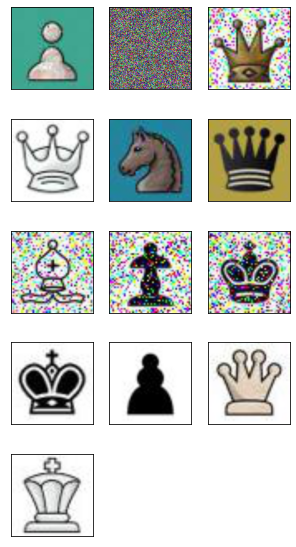

In [ ]:
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
# (code modified; originally taken from tut3b)
fig = plt.figure(figsize=(5, 12))
for idx in np.arange(13):
    ax = fig.add_subplot(6, 3, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))

In [ ]:
# from Lab3
def train_net_v2(net, batch_size=64, learning_rate=0.01, num_epochs=10):
 
    # Fixed PyTorch random seed for reproducible result
    torch.manual_seed(5)

    # Define the Loss function and optimizer
    # The loss function will be CrossEntropyLoss because we are trying to
    # classify 9 different images
    # Using Adam optimizer for the reasons described in text cell above
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(net.parameters(), lr=learning_rate)
    
    train_acc, val_acc = [], []

    # training
    n = 0 # the number of iterations
    for epoch in range(num_epochs):
      print("Epoch num "+str(epoch))

      for imgs, labels in iter(train_loader):
        #To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()

        outputs = net(imgs)           # forward pass
        loss = criterion(outputs, labels) # compute the total loss
        loss.backward()               # backward pass (compute parameter updates)
        optimizer.step()              # make the updates for each parameter
        optimizer.zero_grad()         # a clean up step for PyTorch

        n += 1

      train_acc.append( get_accuracy(net, train_loader))
      print("training accuracy = " + str(train_acc[-1]))

      val_acc.append( get_accuracy(net, val_loader))
      print("validation accuracy = " + str(val_acc[-1]))

      model_path = get_model_name(net.name, batch_size, learning_rate, epoch)
      torch.save(net.state_dict(), model_path)

    # Write the train/test loss/err into CSV file for plotting later
    epochs = np.arange(1, num_epochs + 1)
    np.savetxt("{}_train_accuracy.csv".format(model_path), train_acc)
    np.savetxt("{}_val_accuracy.csv".format(model_path), val_acc)


    return train_acc, val_acc
      

# Summary of Results V1 (for Progress Report July 9th, 2021)

In [ ]:
model = Gesture()
if torch.cuda.is_available():
    model.cuda()
train_net_v2(model,  batch_size=128, learning_rate=0.01, num_epochs=30)
print("DONE!!!!")

Epoch num 0
training accuracy = 0.09171597633136094
validation accuracy = 0.09538461538461539
Epoch num 1
training accuracy = 0.10059171597633136
validation accuracy = 0.10307692307692308
Epoch num 2
training accuracy = 0.10502958579881656
validation accuracy = 0.12
Epoch num 3
training accuracy = 0.1242603550295858
validation accuracy = 0.13692307692307693
Epoch num 4
training accuracy = 0.13313609467455623
validation accuracy = 0.15538461538461537
Epoch num 5
training accuracy = 0.14053254437869822
validation accuracy = 0.16
Epoch num 6
training accuracy = 0.133629191321499
validation accuracy = 0.15076923076923077
Epoch num 7
training accuracy = 0.1858974358974359
validation accuracy = 0.2276923076923077
Epoch num 8
training accuracy = 0.16321499013806706
validation accuracy = 0.18615384615384614
Epoch num 9
training accuracy = 0.133629191321499
validation accuracy = 0.1476923076923077
Epoch num 10
training accuracy = 0.22534516765285997
validation accuracy = 0.24615384615384617
Epo

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f10a8fea320>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


training accuracy = 0.9299802761341223
validation accuracy = 0.8923076923076924
Epoch num 20


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f10a8fea320>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f10a8fea320>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

training accuracy = 0.9580867850098619
validation accuracy = 0.9246153846153846
Epoch num 21


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f10a8fea320>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


training accuracy = 0.9575936883629191


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f10a8fea320>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


validation accuracy = 0.9107692307692308
Epoch num 22


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f10a8fea320>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f10a8fea320>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

training accuracy = 0.9748520710059172


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f10a8fea320>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


validation accuracy = 0.9384615384615385
Epoch num 23


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f10a8fea320>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f10a8fea320>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

training accuracy = 0.9664694280078896
validation accuracy = 0.916923076923077
Epoch num 24


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f10a8fea320>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f10a8fea320>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

training accuracy = 0.9467455621301775


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f10a8fea320>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


validation accuracy = 0.9
Epoch num 25


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f10a8fea320>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f10a8fea320>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

training accuracy = 0.9644970414201184


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f10a8fea320>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


validation accuracy = 0.9123076923076923
Epoch num 26


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f10a8fea320>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f10a8fea320>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

training accuracy = 0.967948717948718


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f10a8fea320>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


validation accuracy = 0.9230769230769231
Epoch num 27


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f10a8fea320>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f10a8fea320>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

training accuracy = 0.9891518737672583


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f10a8fea320>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


validation accuracy = 0.9307692307692308
Epoch num 28


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f10a8fea320>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f10a8fea320>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

training accuracy = 0.9866863905325444


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f10a8fea320>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


validation accuracy = 0.9338461538461539
Epoch num 29


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f10a8fea320>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f10a8fea320>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

training accuracy = 0.9861932938856016


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f10a8fea320>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


validation accuracy = 0.9292307692307692
DONE!!!!


In [ ]:
!python train.py --img 200 --batch 50 --epochs 200 \
  --adam --data /content/yolov5/FEN.yaml --weights yolov5x.pt \
  --name yolov5x_b50_ep200_run_train282_val61_adam --cache --project /content/drive/MyDrive/APS360_Project_Group_3/YOLOv5

python3: can't open file 'train.py': [Errno 2] No such file or directory
